<a href="https://colab.research.google.com/github/kiran9615/EDA_airbnb-hosting-data-analysis/blob/main/Airbnb_Bookings_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more.***

# ***This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values.***

***Explore and analyze the data to discover key understandings (not limited to these) such as :***

*What can we learn about different hosts and areas?*

*What can we learn from predictions? (ex: locations, prices, reviews, etc)*

*Which hosts are the busiest and why?*

*Is there any noticeable difference of traffic among different areas and what could be the reason for it?*

In [ ]:
#importing all the necessary modules needed during analysis
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# mounting google drive in colab 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#reading airbnb data 
file_path = '/content/drive/MyDrive/Datascience/Datasets/Airbnb NYC 2019.csv'
airbnbNY_data = pd.read_csv(file_path)

# ***Part 1: Basic datapreprocessing and Cleaning***

In [ ]:
#----------------------Block 1----------------------------------

#checking for no. of observations and features in our dataset
airbnbNY_data.shape

(48895, 16)

*We have a listings of 48895 observations with 16 features*

In [ ]:
#----------------------Block 2----------------------------------

# visualising first 5 observations from our dataset 
airbnbNY_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


 ****Data Dictionary****

*1. ID - ID is just an unique identifier of each row.*

*2. Name - It is a rental name which user sees while booking(hotel name).*

*3. Host ID - Every host on Airbnb gets an unique host id, host id here represents that id only.*

*4. Host name - Name of the host.*

*5. Neighbourhood_group - Whole New York is divied into 5 neighbourhood_group(boroughs) regionally. It shows in which borough particular listing is located.*

*6. Neighbourhood - Each borough is further sub divided into neighbourhoods. This column shows the neighbourhood of particular listing.*

*7. Latitude and longitude - These shows the geographical positions of a rental.*

*8. Room_Type -  Which room type a rental is offering.*

*9. Price - Price per night that a rental is charging.*

*10. Minimum Nights - For this much of nights minimally rental can be booked.*

*11. Number of reviews - Number of reviews a rental has got till now.*

*12. Review Per month - An average no. of reviews that a rental got per month.*

*13. Last review - Date on which a rental got their last review.*

*14. calculated_host_listings_count -  It is the no. of rentals a host is hosting in the dataset.*

*15. Availability 365 - It is the no. of days for which a rental is available to book.*

*NOTE - I have used the word rentals, listings and hostings interchangably here. All of these means the same.*

In [ ]:
#----------------------Block 3----------------------------------

#getting basic information about dataset
airbnbNY_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

*Outcomes*

*1. Dataype of each columns*

*2. Memory usage due to dataset*

*3. Number of non null values in each columns*


In [ ]:
#----------------------Block 4----------------------------------

# getting count of each null values in each column
airbnbNY_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

*1. Although Name and Host name has null values but it won't be of significant use in our analysis, we won't be caring much about it.*

*2. Last review and review per month both have same number of null values. Actual reason is they are interdependent. Last_review includes a date of last review of specific listing. If it is null that means listing hasn't got any reviews yet and for the same reason review per moth is also null.*

*3. If you look for the observations having review_per_month and last_review as null values, logiclly no. of reviews value should be zero there. So, lets verify this.* 



In [ ]:
#----------------------Block 5----------------------------------

# checking for number_of_review unique values where we have null values for last_review and review_per_month 
airbnbNY_data[airbnbNY_data['last_review'].isnull() & airbnbNY_data['reviews_per_month'].isnull()]['number_of_reviews'].value_counts()

0    10052
Name: number_of_reviews, dtype: int64

*We will delete the last review column from dataframe as that is not much useful in terms of further data analysis and make reviews_per_ month  0 where reviews_per_month is Null.*

In [ ]:
#----------------------Block 6----------------------------------

airbnbNY_data.drop(['last_review'],axis = 1, inplace = True)   # dropping last review column
airbnbNY_data['reviews_per_month'].fillna(0,inplace=True)    #filling null values with 0 in reviews_per_month column

*Name of hotel is also not of a significant use to us so we'll drop that as well*

In [ ]:
#----------------------Block 7----------------------------------

airbnbNY_data.drop(['name'],axis = 1, inplace = True)   # dropping name column
airbnbNY_data.drop(['host_name'],axis = 1, inplace = True)   # dropping host_name column

In [ ]:
#----------------------Block 8----------------------------------

#null values check
airbnbNY_data.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

*We have treated null values and dropped all unneccesary columns as well .*

In [ ]:
#----------------------Block 9----------------------------------

#checking for descriptive summary of data
airbnbNY_data.drop(['id','host_id','latitude','longitude'], axis =1).describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.090910,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.597283,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


*Descriptive table tells us that except availability 365, all other features has some serious outliers.*

*As a part of this project we are only performing EDA .So there might not be a need of outlier treatment but in some specific cases outliers affects our EDA task as well. So we'll look for temporary treatment at that point.*


# ***Part 2: Feature analysis and engineering***

##***1 .Visualising and analysing about different areas(neighbourhood and boroughs)***

In [ ]:
#----------------------Block 10----------------------------------

# unique categories in neighbourhood_group
airbnbNY_data['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

*1. There are total of 5 neighbourhood groups.*


*2. In New York whole New York city has been divided in these(neighbourhood_group) five adminstrative region and these are called borough there. So we will rename the neighbourhood_group columns to borough for better comprehensiveness.*


In [ ]:
#----------------------Block 11----------------------------------

airbnbNY_data.rename(columns={'neighbourhood_group':'borough'}, inplace=True) # renaming neighbourhood group column to borough

In [ ]:
#----------------------Block 12----------------------------------


airbnbNY_data.head()  # data check for column rename 

,id,host_id,borough,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


###**Lets look into how hosting is divided among these boroughs**

In [ ]:
#----------------------Block 13----------------------------------

#checking for the observations under each borough
borough_hositing = airbnbNY_data['borough'].value_counts().sort_values(ascending=False)
borough_hositing

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: borough, dtype: int64

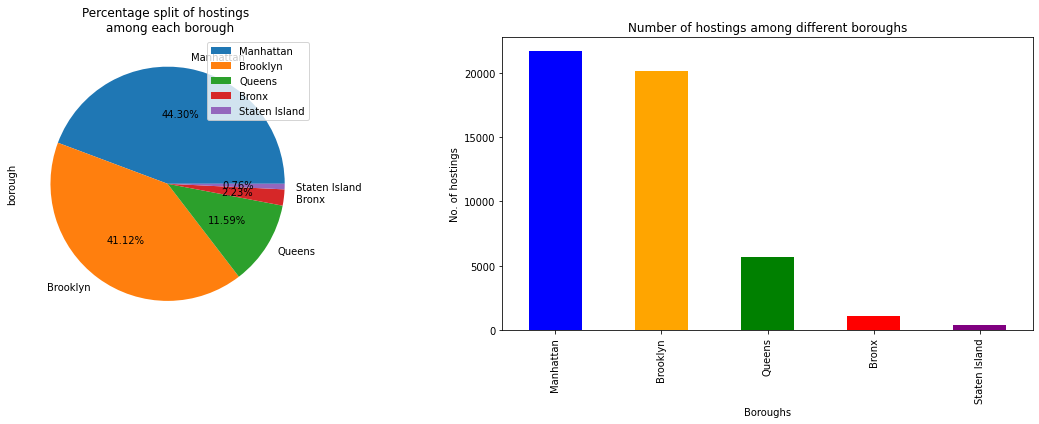

In [ ]:
#----------------------Block 14----------------------------------

#plotting the above found details
fig,axes= plt.subplots(1,2,figsize=(16,6))
borough_hositing.plot.pie(autopct = '%1.2f%%', ax = axes[0]) #pie plot
axes[0].set_title('Percentage split of hostings \n among each borough')  # title for pie plot
axes[0].legend()
borough_hositing.plot.bar(ax = axes[1],color=['blue','orange','green','red','purple'])  #bar plot
axes[1].set_title('Number of hostings among different boroughs')  # title for bar plot
axes[1].set(ylabel='No. of hostings', xlabel='Boroughs')   # labelling y and x axis
fig.tight_layout() #for creating proper spacing and arrangement among different figures on canvas

*From above charts we can see that major no. of hostings are from Brooklyn and Manhattan from this listing of airbnb New York city whereas Staten Island and Bronx are way too less populous in terms of hostings.*

*Actually Manhattan is one of  the most attracted tourism borough in New York called to be as a heart of New York city and Brooklyn follows after Manhattan and also it is most populous borough that is one of the strong reason for Brooklyn and Manhattan to be dominating in terms of hostings.* 


###**Checking for some of the top neighbourhoods and to which borough they belong**




*Note : We are qualifying neighbourhood as top on the basis of number of hostings.*



In [ ]:
#----------------------Block 15----------------------------------

#grouping observation on borough first and then on neighbourhood and then picking up their count
top_20_neighbourhood = airbnbNY_data.groupby(['borough','neighbourhood']).agg({'id':'count'}).sort_values(by='id',ascending=False)[0:20].reset_index()
top_20_neighbourhood.rename(columns={'id':'num of hostings'},inplace=True)
top_20_neighbourhood

,borough,neighbourhood,num of hostings
0,Brooklyn,Williamsburg,3920
1,Brooklyn,Bedford-Stuyvesant,3714
2,Manhattan,Harlem,2658
3,Brooklyn,Bushwick,2465
4,Manhattan,Upper West Side,1971
5,Manhattan,Hell's Kitchen,1958
6,Manhattan,East Village,1853
7,Manhattan,Upper East Side,1798
8,Brooklyn,Crown Heights,1564
9,Manhattan,Midtown,1545


{'Queens': 'darkslategray', 'Brooklyn': 'teal', 'Manhattan': 'darkturquoise'}


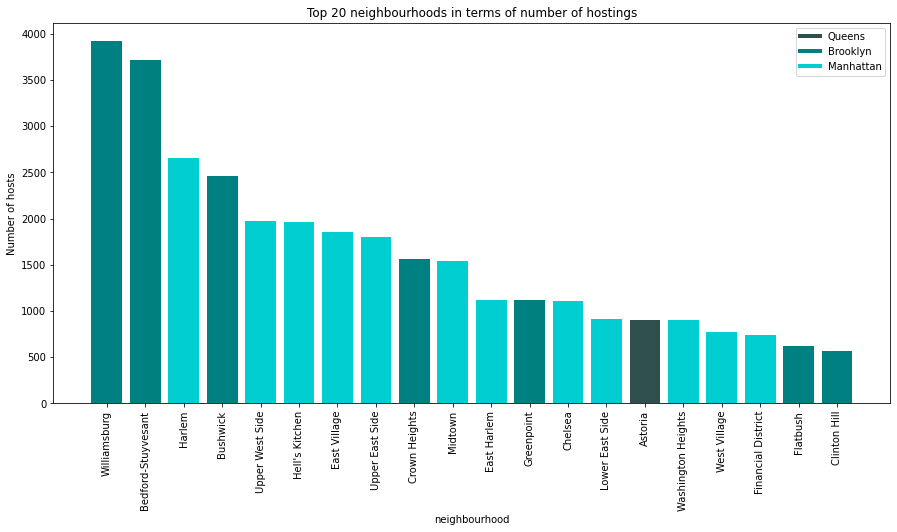

In [ ]:
#----------------------Block 16----------------------------------

#visualising the same
plt.figure(figsize=(15,7))
from matplotlib.lines import Line2D
borough_dict = {} #initialising an empty dictionary to store the colour representation of boroughs
unique_borough = set(list(top_20_neighbourhood['borough']))
borough_list = list(top_20_neighbourhood['borough'])
color_list=[] #initialising an empty list for storing the colour of each bar in bar plot
color=['darkslategray','teal','darkturquoise']
index=0
for borough in unique_borough:
  borough_dict[borough] =color[index] #assigning unique colour that represents each borough
  index=index+1
for borough in borough_list:   
       color_list.append(borough_dict[borough]) #storing the colour of each bar of bar plot in color_list
plt.bar(top_20_neighbourhood['neighbourhood'],top_20_neighbourhood['num of hostings'],color=color_list) #plotting a bar plot
# creating a custom labels for a graph
labels = list(borough_dict.keys())
custom_lines = [Line2D([1,2,5,5], [1,2,5,5], color='darkslategray', lw=4),
                Line2D([1,2,5,5], [1,2,5,5], color='teal', lw=4),
                Line2D([1,2,5,5], [1,2,5,5], color='darkturquoise', lw=4)]
plt.xticks(rotation = 90)
plt.legend(custom_lines,labels)
plt.xlabel('neighbourhood')
plt.ylabel('Number of hosts')
plt.title("Top 20 neighbourhoods in terms of number of hostings")

*From the above graph we can see that :*

* Among top 20 neighbourhoods most of these neighbourhood belongs to Manhattan borough.
*Although If looking for top 3 densely hosted neighbourhood top 2 belongs to Brooklyn.

###**Neighbourhoods each borough have**

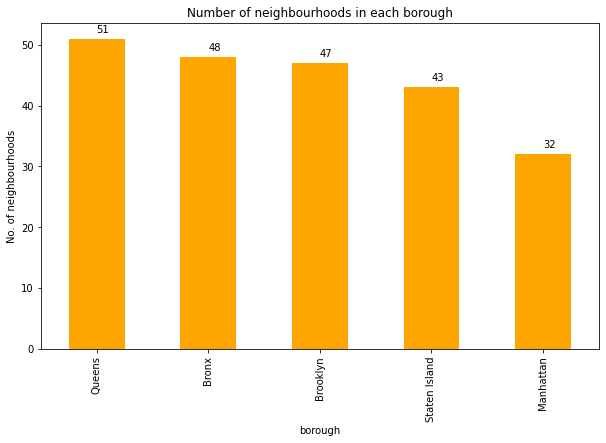

In [ ]:
#----------------------Block 17----------------------------------

fig = plt.figure(figsize=(10,6)) #defining figure
ngbrhood = airbnbNY_data.groupby('borough')['neighbourhood'].nunique().sort_values(ascending=False) # number of unique neighbourhoods in each borough
ngbrhood.plot.bar(color='orange')  # bar plot
plt.ylabel('No. of neighbourhoods')
plt.title('Number of neighbourhoods in each borough')
for ind, val in enumerate(ngbrhood):
  plt.text(x = ind, y =val+1, s = str(val))  #plotting the numbers over the bar

*Although Mahnhattan and Brooklyn have most no. of hostings but in terms of neighbourhood they are quite back.*

*Reason for it can be Manhattan and Brooklyn have most tourist places and many hostings has been bunched around under same neigbourhood. Thus having most hostings without having much of neighbourhoods.*

###**Lets look for the price distribution in each boroughs**

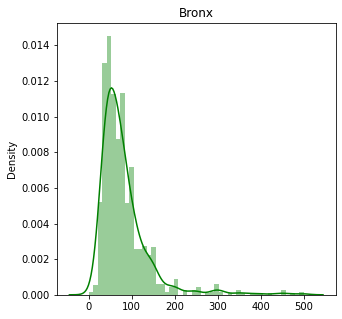

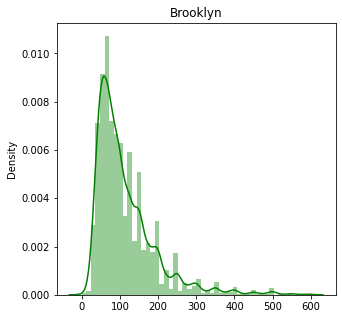

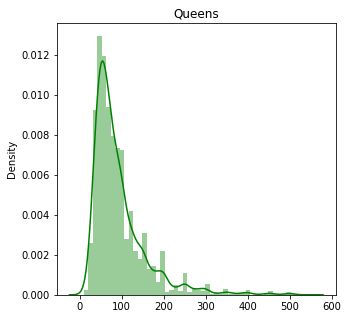

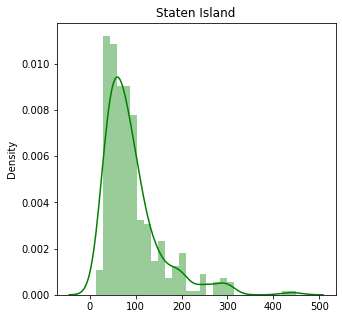

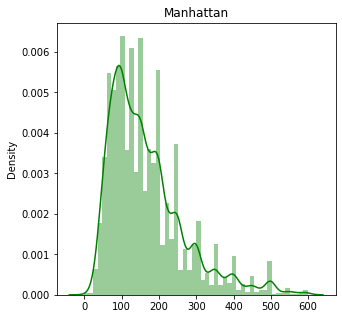

In [ ]:
#----------------------Block 18----------------------------------

boroughs = set(list(airbnbNY_data['borough'])) # storing distinct boroughs
for borough in boroughs:
  fig = plt.figure(figsize=(5,5))
  axs = fig.gca()  # gca--> get current axis
  price_dist = list(airbnbNY_data[airbnbNY_data['borough']== borough]['price'])# list of price for each borough
  price_dist = [price for price in price_dist if price < 600] # Limiting price value to 600 to avoid outliers that limits our visualisation
  axs.set_title(borough)
  sns.distplot(price_dist, ax=axs,color='green')  #distribution plot

*Note as told earlier as needed here we have done an outlier treatment.*

*Even after removing outliers still the data is bit skewed. We can further decrease the threshold of price also.*

*For Manhattan price range mostly varies between 80-250 approx.*

*For Brooklyn price range mostly varies between 40-110 approx.*

*For Bronx its quite low and somewhere limits between 30-80.*

*Staten Island and Queens is quite similar and is somewhere ends up nearby or less than 100.*

*Note : Prices are heavily influenced by the outliers .I have set an threshold of price 600 in order to avoid outlier so that we can visualize the range better.*

###**Lets check how does an average price varies in each borough**

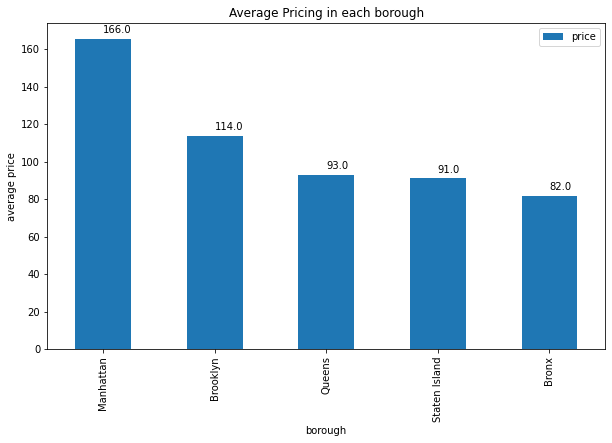

In [ ]:
#----------------------Block 19----------------------------------

fig= plt.figure(figsize=(10,6))
axes = fig.gca()
avgprice_df = airbnbNY_data[airbnbNY_data['price']<600]  # creating sub dataframe with price less than 600
avgprice_borough = avgprice_df.groupby('borough').agg({'price':'mean'}).sort_values(by='price',ascending = False)#grouping by arrow and averaging out by price
avgprice_borough.plot.bar(ax = axes)  # bar plot
plt.title('Average Pricing in each borough')
avgprice = list(np.around(avgprice_borough.values.reshape(5,))) #rounding up and storing average price of each borough in a list
axes.set_ylabel('average price')
for ind, val in enumerate(avgprice):
  axes.text(x = ind, y =val+3, s = str(val))

* Manhattan is one of the borough that charges quite high for hostings followed by Brooklyn.

* Manhattan include most of the tourist places including Times Square that can be the reason of this price hikes.


###**Lets check the same in terms of price for each neighbourhood**

Text(0.5, 1.0, '10 Neighbourhoods having highest average prices')

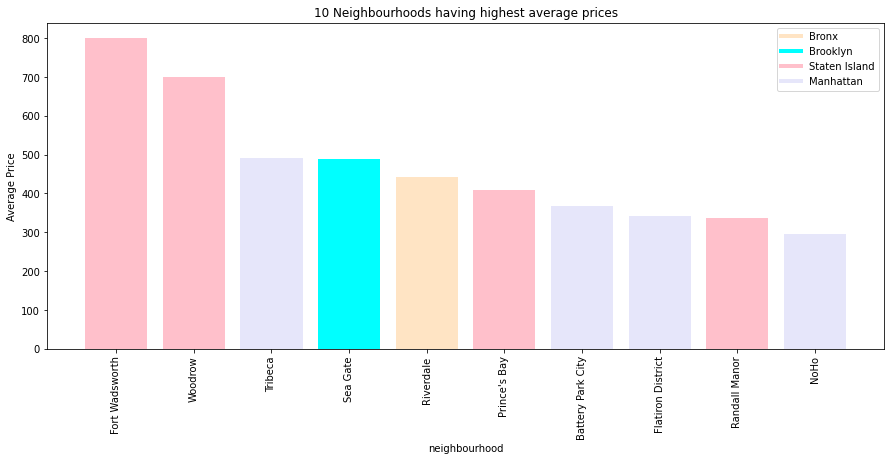

In [ ]:
#----------------------Block 20----------------------------------

#Seperating out the top 10 neighbourhoods with highest average charges
avgprice_neighbourhood = airbnbNY_data.groupby(['borough','neighbourhood']).agg({'price':'mean'}).reset_index().sort_values(by='price',ascending=False)[0:10]
plt.figure(figsize=(15,6))
borough_dict = {}   #dictionary to store unique borough and color label associated with it 
unique_borough = set(list(avgprice_neighbourhood['borough']))  # seperating out the unique borough names from sub dataframe
borough_list = list(avgprice_neighbourhood['borough'])  #listing out all observations boroughs from sub dataframe
color_list=[]  # list to store the color associated with bar plots
color=['bisque','cyan','pink','lavender','red']
index=0 
for borough in unique_borough:
  borough_dict[borough] =color[index]
  index=index+1
for borough in borough_list:   
       color_list.append(borough_dict[borough])
plt.bar(avgprice_neighbourhood['neighbourhood'],avgprice_neighbourhood['price'],color=color_list)
labels = list(borough_dict.keys())
custom_lines = [Line2D([0], [0], color='bisque', lw=4),  # custom limes for label of bar graph 
                Line2D([0], [0], color='cyan', lw=4),
                Line2D([0], [0], color='pink', lw=4),
                Line2D([0], [0], color='lavender', lw=4),
                Line2D([0], [0], color='red', lw=4)]
plt.xticks(rotation = 90)
plt.legend(custom_lines,labels)
plt.xlabel('neighbourhood')
plt.ylabel('Average Price')
plt.title("10 Neighbourhoods having highest average prices")

*Staten Islands neighbourhoods seems to have some of the top chargable rentals and Manhattan follows them. Although from our previous analysis it seems that Manhattan is one of the expensive borough but still We have to investigate it a bit further as this might be the result of strong outliers as well. So lets visualize box plots for these 10 neighbourhoods to know if they actually have a higher prices or its just some strong outliers.*

In [ ]:
#----------------------Block 21----------------------------------

# nghbrhood function to segregate the dataframe only for top 10 neighbours
def nghbrhood(col):
  if col in neighbourhood_lst:
    return True
  else:
    return False

Text(0.5, 1.0, 'Price distribution in top 10 neighbourhoods')

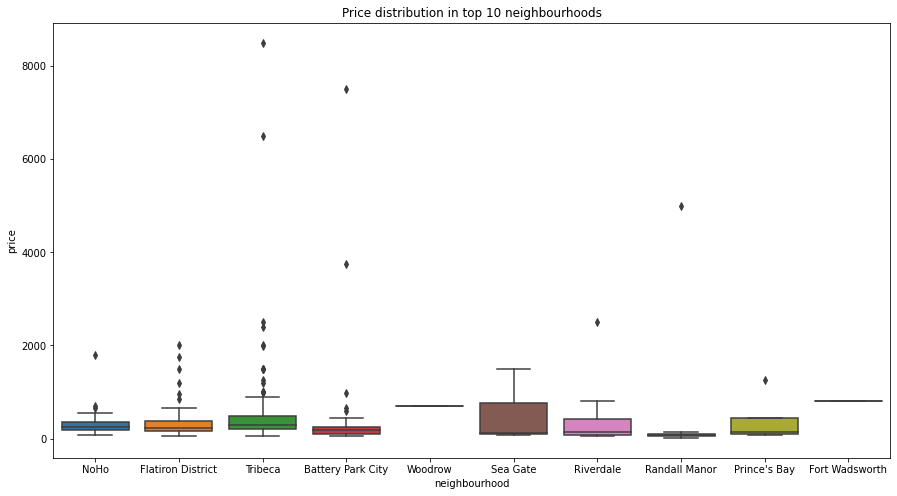

In [ ]:
#----------------------Block 22----------------------------------

neighbourhood_lst = list(avgprice_neighbourhood['neighbourhood'])
plt.figure(figsize=(15,8))
df_nghbrhoodprice = airbnbNY_data[airbnbNY_data['neighbourhood'].apply(nghbrhood)]  #applying above defined function 
sns.boxplot(x='neighbourhood',y='price', data = df_nghbrhoodprice )  # boxplot
plt.title('Price distribution in top 10 neighbourhoods')

*So as thought it seems that Fort Wadsworth and Woodrow doesn't have multiple entries they both only have one listing, Fort Wadsworth with price nearby 800 and Woodsrow having a price nearby 700.*

*Whereas Tribeca, Flatiron district and battery part city is heavily influenced by the outliers.*

*Prince's bay and River Dales are the ones that doesnt seems to be affected by the outlier and in general have higher prices.*

*Lets see if we try with the threshold price of 600 how does result varies.*

Text(0.5, 1.0, '10 Neighbourhoods having highest average prices')

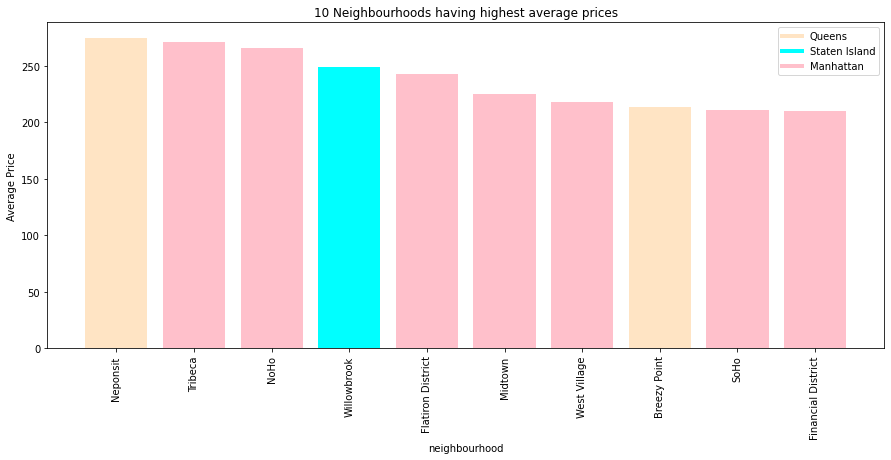

In [ ]:
#----------------------Block 23----------------------------------

#Seperating out the top 10 neighbourhoods with highest average charges having price threshold 600
avgprice_neighbourhood = avgprice_df.groupby(['borough','neighbourhood']).agg({'price':'mean'}).reset_index().sort_values(by='price',ascending=False)[0:10]
plt.figure(figsize=(15,6))
borough_dict = {}   #dictionary to store unique borough and color label associated with it 
unique_borough = set(list(avgprice_neighbourhood['borough']))  # seperating out the unique borough names from sub dataframe
borough_list = list(avgprice_neighbourhood['borough'])  #listing out all observations boroughs from sub dataframe
color_list=[]  # list to store the color associated with bar plots
color=['bisque','cyan','pink','blue','red']
index=0
for borough in unique_borough:
  borough_dict[borough] =color[index]
  index=index+1
for borough in borough_list:   
       color_list.append(borough_dict[borough])
plt.bar(avgprice_neighbourhood['neighbourhood'],avgprice_neighbourhood['price'],color=color_list)
labels = list(borough_dict.keys())
custom_lines = [Line2D([0], [0], color='bisque', lw=4),  # custom limes for label of bar graph 
                Line2D([0], [0], color='cyan', lw=4),
                Line2D([0], [0], color='pink', lw=4),
                Line2D([0], [0], color='blue', lw=4),
                Line2D([0], [0], color='red', lw=4)]
plt.xticks(rotation = 90)
plt.legend(custom_lines,labels)
plt.xlabel('neighbourhood')
plt.ylabel('Average Price')
plt.title("10 Neighbourhoods having highest average prices")

Text(0.5, 1.0, 'Price distribution in top 10 neighbourhoods')

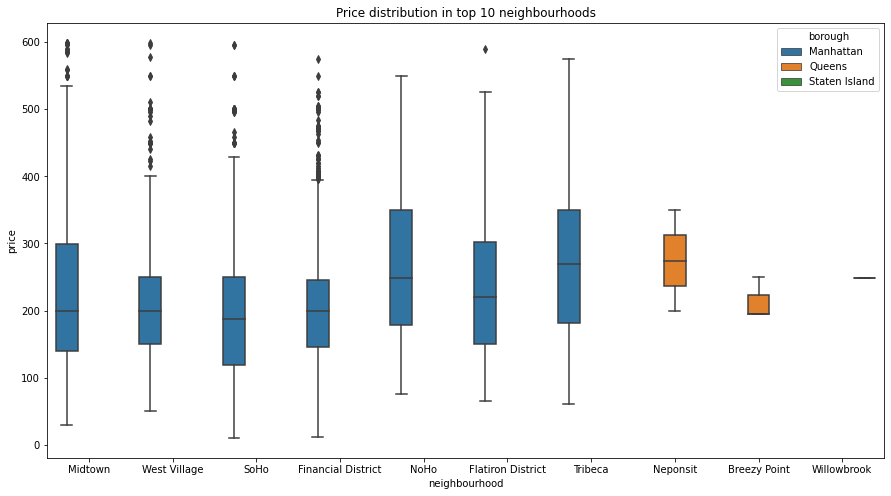

In [ ]:
#----------------------Block 24----------------------------------
neighbourhood_lst = list(avgprice_neighbourhood['neighbourhood'])
plt.figure(figsize=(15,8))
df_nghbrhoodprice = avgprice_df[avgprice_df['neighbourhood'].apply(nghbrhood)]  #applying above defined function 
sns.boxplot(x='neighbourhood',y='price', hue='borough',data = df_nghbrhoodprice)  # boxplot
plt.title('Price distribution in top 10 neighbourhoods') #adding title to the plot

*As we have changed a price threshold to 600 picture changes pretty much thus these neighhbourhood prices are influenced by outliers. You can also try changing multiple threshold and can visualize how the graph and neighbourhood changes* 

###**We have played pretty much along with area and collected an info :**


*1. Among all 5 boroughs Manhattans and Brooklyn are the ones who have most rentals. Manhattan is the most famous tourism borough and that is one of the reasons for most rentals.*

*2. Although Manhattan dominates in no. of hostings but neighbourhoods of Brooklyn dominates on first 2 positions in among top 20 neighbourhoods. Still if we quantify the result than we see we have most number of Manhattan neighbourhoods tooks a place among top 20 neighbourhood.*

*3. Williamsburg is a hip neighbourhood in Brooklyn that draws the young and the fashionable to its chic boutiques, trendy cafes and buzzy restaurants. Street art brightens residential thoroughfares and repurposed factories, while the waterfront provides stunning views of Manhattan and seasonal venues for outdoor concerts and food markets.*

*4.Number of neighbourhood is highest in Queens and lowest in Manhattan still Manhattan has most no. of rentals.*

*5. Due to this tourism factor average price of rentals is higher in Manhattan and after Manhattan Brooklyn follows it.*

*6. Price data contains too many outliers, mostly the price of hotel saturates at max near 500-600 but we have some rentals charging as high as 10000. Thus creating a bias in average prices. We have tried to visualize the price data among different neighbourhoods and in that case also after outlier treatment out of top higest pricing neighbourhood 7 belongs to Manhattan.*
